In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("list_vehicle.csv")
df

,id,name,type,country_origin,operator_countries,year_start,mass_kg,crew,main_armament,armor_type,engine_type,engine_hp,range_km,speed_kmh,ammo_types
0,1,T-34-85,Средний танк,СССР,"СССР, Россия, Вьетнам, Куба и другие",1944,32000.0,5,85-мм пушка,Катаная стальная гомогенная,Дизель,500.0,300.0,55.0,"Бронебойный, ОФС"
1,2,ИС-2,Тяжелый танк,СССР,"СССР, Китай, Польша, Чехословакия",1943,46000.0,4,122-мм пушка,Катаная и литая стальная,Дизель,600.0,240.0,37.0,"Бронебойный, ОФС"
2,3,КВ-1,Тяжелый танк,СССР,"СССР, Финляндия",1939,45000.0,5,76-мм пушка,Катаная стальная,Дизель,600.0,250.0,34.0,"Бронебойный, ОФС"
3,4,Т-54,Основной боевой танк,СССР,"СССР, Россия, страны Варшавского договора и др...",1947,36000.0,4,100-мм пушка,Катаная стальная гомогенная,Дизель,520.0,400.0,50.0,"БОПС, КС, ОФС"
4,5,Т-62,Основной боевой танк,СССР,"СССР, Россия, Египет, Сирия и другие",1961,37000.0,4,115-мм пушка,Катаная стальная гомогенная,Дизель,580.0,450.0,50.0,"БОПС, КС, ОФС"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Тунгуска,ЗСУ,СССР,"Россия, Индия, Украина, Йемен",1982,34000.0,4,2x30-мм автопушки,Стальная,Дизель,790.0,500.0,65.0,"ОФС, Зенитные ракеты"
96,97,C1 Ariete Hitfact,Основной боевой танк,Италия,Италия (прототип),2002,60000.0,4,120-мм пушка,Композитная,Дизель,1600.0,600.0,65.0,"БОПС, КС"
97,98,Zulfiqar,Основной боевой танк,Иран,Иран,1996,36000.0,3,125-мм пушка,Композитная,Дизель,780.0,450.0,70.0,"БОПС, КС"
98,99,Karrar,Основной боевой танк,Иран,Иран,2017,51000.0,3,125-мм пушка,"Композитная, ДЗ",Дизель,1000.0,550.0,70.0,"БОПС, КС, ПТУР"


### Анализ 1: Эволюция и гонки вооружений
#### Разработка военной техники неравномерна во времени и активизируется в периоды мировых конфликтов и напряженности (Вторая мировая война, Холодная война).
На этом графике мы видим распределение производства новой техники по десятилетиям. Отчетливо видны два пика: первый в 1940-х, что соответствует Второй мировой войне, и второй, растянутый с 1960-х по 1980-е, - пик Холодной войны. В современности все еще очень высок уровень мировой напряженности, около 55 вооруженных конфликтов по всему миру, из-за чего урвоень производтсва вооружений не снижается. Это доказывает, что исторические периоды напрямую влияют на технологические скачки. Мой проект позволяет пользователю мгновенно отфильтровать технику по этим ключевым временным промежуткам и самостоятельно изучить, какие именно технологии появлялись в эти эпохи.

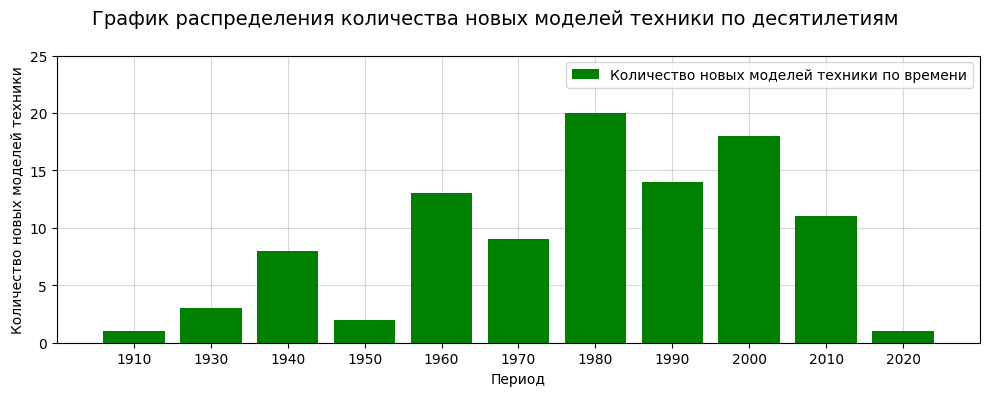

In [65]:
decade = sorted(list((df['year_start'] // 10) * 10))
decade_Series = pd.Series(decade)
counts_decade = decade_Series.value_counts()
sorted_counts_decade = counts_decade.sort_index()

x = np.arange(11)

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(x, sorted_counts_decade.values, label='Количество новых моделей техники по времени', color='green', zorder=2)

fig.suptitle(r'График распределения количества новых моделей техники по десятилетиям', fontsize=14)
ax.set_xlabel('Период')
ax.set_ylabel('Количество новых моделей техники')

ax.grid(True, alpha=0.5)

ax.legend()

ax.set(xlim=(-1, 11))
ax.set(ylim=(0, 25))

xticks = np.arange(11)
xticklabels = sorted_counts_decade.index
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

plt.tight_layout()
plt.show()

### Анализ 2: Сравнение национальных «инженерных школ»
#### Разные страны-лидеры придерживаются разных философий в танкостроении. Например, можно проверить стереотип: "советские танки более легкие и быстрые, а западные — тяжелее и мощнее".

Какие данные сравнивать:

mass_kg (Масса)

engine_hp (Мощность двигателя)

country_origin (Страна-производитель)

Какой график построить: Диаграмма рассеяния (Scatter Plot).

Ось X: Масса ( mass_kg )

Ось Y: Мощность двигателя ( engine_hp )

Цвет точек: Страна-производитель ( country_origin )

Как это сделать:

Отфильтруйте DataFrame, оставив только "Основной боевой танк" и несколько ключевых стран (например, СССР, Россия, США, Германия, Великобритания).

Постройте диаграмму рассеяния, используя matplotlib или seaborn (в seaborn это делается очень легко с параметром hue).

Примерный вывод для защиты:

"Эта диаграмма сравнивает массу и мощность двигателей танков ведущих стран. Мы видим несколько кластеров. Танки СССР/России (красные точки) исторически тяготеют к меньшей массе при сохранении высокой удельной мощности. Американские и немецкие танки (синие и зеленые точки) смещены вправо и вверх — они тяжелее, но с очень мощными двигателями. Это наглядно показывает разницу в подходах к проектированию. Именно для такого многофакторного анализа и сравнения и был создан мой проект — пользователь может выбрать любые две машины и в удобной таблице сопоставить их характеристики".

In [ ]:
main_battle_tank = df.loc[df['type'] == "Основной боевой танк"]
main_battle_tank.head()

34

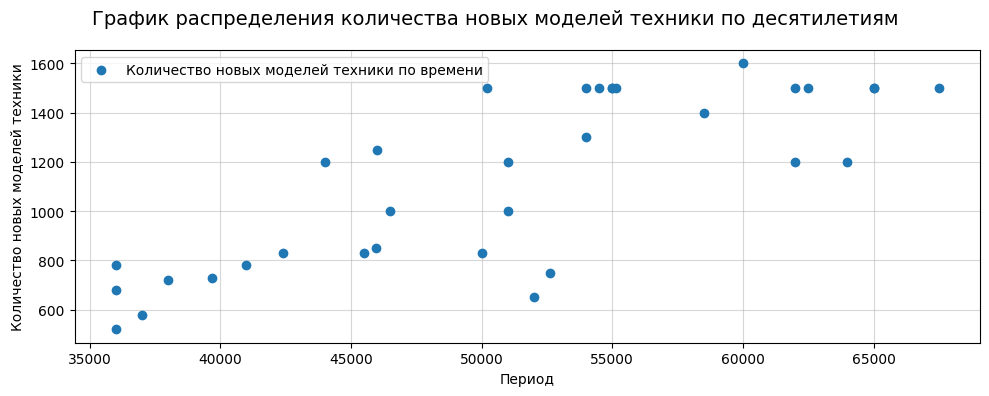

In [82]:
main_battle_tank = df.loc[df['type'] == "Основной боевой танк"]

x = np.arange(11)

fig, ax = plt.subplots(figsize=(10, 4))

ax.scatter(main_battle_tank['mass_kg'], main_battle_tank['engine_hp'], label='Количество новых моделей техники по времени', zorder=2)

fig.suptitle(r'График распределения количества новых моделей техники по десятилетиям', fontsize=14)
ax.set_xlabel('Период')
ax.set_ylabel('Количество новых моделей техники')

ax.grid(True, alpha=0.5)

ax.legend()

#ax.set(xlim=(-1, 11))
#ax.set(ylim=(0, 25))

#xticks = np.arange(11)
#xticklabels = sorted_counts_decade.index
#ax.set_xticks(xticks)
#ax.set_xticklabels(xticklabels)

plt.tight_layout()
plt.show()

In [ ]:
semesters = [1, 2, 3, 4, 5, 6, 7, 8]
excellent_grades = [3, 5, 7, 6, 9, 8, 10, 12]

fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(semesters, excellent_grades, color='green')

ax.set_title('Количество оценок "отлично" по семестрам студента Васи', fontsize=14, pad=20)
ax.set_xlabel('Номер семестра', fontsize=12)
ax.set_ylabel('Количество "отлично"', fontsize=12)
ax.set_xticks(semesters)
ax.grid(axis='y', alpha=0.4)

ax.set_ylim(0, max(excellent_grades) + 1)

plt.show()

In [ ]:
temperature = [-5, -6, -1, 6, 12, 16, 18, 16, 11, 6, 0, -3]
mounths = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

x = np.arange(12)

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, temperature, label='Среднемесячная температура')

fig.suptitle(r'График зависимости среднемесячной температуры от месяца в городе Псков', fontsize=14)
ax.set_xlabel('Месяц')
ax.set_ylabel('Температура, в °C')

ax.grid(True, alpha=0.5)

ax.legend()

ax.set(xlim=(0, 1))
ax.set(ylim=(-10, 30))

xticks = np.arange(12)
xticklabels = mounths
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

plt.show()

In [ ]:
countries = []

with open('Students Social Media Addiction.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
        
    for row in reader:
        if len(row) > 4:
            country = row[4].strip()
            if country:
                countries.append(country)
                
    country_counts = dict(Counter(countries))
    sorted_countries = dict(sorted(country_counts.items(), key=lambda x: x[1], reverse=True))
    country_names = [item for item, value in sorted_countries.items()]
    respondent_counts = [value for item, value in sorted_countries.items()]

    print(sorted_countries)


fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(country_names[:33], respondent_counts[:33], color='green', width=0.8) # беру немного потому что много по 1 студенту

ax.set_title('Распределение респондентов по странам (первая 31 страна)', fontsize=20, pad=20)
ax.set_xlabel('Страна', fontsize=12)
ax.set_ylabel('Количество респондентов', fontsize=12)
ax.grid(axis='y', alpha=0.4)

plt.setp(ax.get_xticklabels(), rotation=45, fontsize=9)

plt.show()